<img src="https://www.rp.edu.sg/images/default-source/default-album/rp-logo.png" width="200" alt="Republic Polytechnic"/>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ipomoeabatatas/ubts_day_02/blob/main/Agents/Activity_02.ipynb)

## Create Agents to Research and Write an Article **with Tools**

In this lesson, you will be learn how tools are defined and use. This lesson is built on top of the prior lesson on foundational concepts of multi-agent systems and get an overview of the crewAI framework.

By using a Tool that performs web search, your agent can have access to information that it was not trained on.

### Getting Started.

This notebook is designed to work in Google Colab.
For secret and keys, it has to be stored and accessed via the Secrets feature.

**Create** a secret key OPENAI_API_KEY using the SECRET Features.

**Create** a secret key SERPER_API_KEY from https://serper.dev/

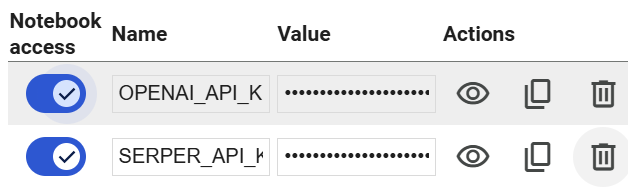




## Install the required projects


In [ ]:
!pip install crewai==0.108.0
!pip install crewai-tools==0.40.0

!pip install boto3  # workaround for incomplete crewai-tools dependency

In [ ]:
! pip freeze | grep crewai

crewai==0.108.0
crewai-tools==0.40.0


Expected results:  
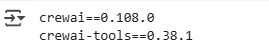

In [ ]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

import os
from datetime import datetime

# Set variables for control
__TODO__ = None
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')  # e.g., 20250408_153012


Import from the crewAI library.

We also import in the CrewAI build-on Tools:
* SerperDevTool - to search the web via the Serper.dev API, which is a
Google Search API.
* WebSiteSearchTool - A RAG tool for searching website content, optimized for web data extraction.
* DirectoryReadTool - Facilitates reading and processing of directory structures and their contents.
* FileReadTool - Enables reading and extracting data from files, supporting various file format

In [ ]:


from google.colab import userdata
from crewai import Agent, Task, Crew, LLM


# Importing crewAI tools
from crewai_tools import (
    SerperDevTool,
    WebsiteSearchTool
)

## Define the LLM For The Agent
In the example below, OpenAI is used. We can either
set the connection information through the environment variables,
or directly input as a parameter in the LLM class.

In [ ]:
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
#os.environ["OPENAI_MODEL_NAME"] = 'gpt-3.5-turbo'

## TODO : Instantiate the LLM model
llm = LLM(__TODO__)
)


## Instantiate the Tools

We will use two tools that are popular for searching website and to search the contents of a website.

The SERPER tool will need an API key.

In [ ]:
os.environ["SERPER_API_KEY"] = userdata.get('SERPER_API_KEY')

# Instantiate tools
search_tool = SerperDevTool()
web_rag_tool = WebsiteSearchTool()

## Creating Agents

- Define your Agents, and provide them a `role`, `goal` and `backstory`.
- It has been seen that LLMs perform better when they are role playing.

### Agent: Planner

**Note**: The benefit of using _multiple strings_ :
```Python
varname = "line 1 of text"
          "line 2 of text"
```

versus the _triple quote docstring_:
```Python
varname = """line 1 of text
             line 2 of text
          """
```
is that it can avoid adding those whitespaces and newline characters, making it better formatted to be passed to the LLM.

## Define the agent
## Include the parameter to assign the tools to the agent



In [ ]:
planner = Agent(
    role="Content Planner",
    goal="Plan engaging and factually accurate content on {topic}",
    backstory="You're working on planning a blog article "
              "about the topic: {topic}."
              "You collect information that helps the "
              "audience learn something "
              "and make informed decisions. "
              "Your work is the basis for "
              "the Content Writer to write an article on this topic.",
    llm=llm,
    allow_delegation=False,
    ## TODO: Assign the tools  hint: search_tool & web_rag_tool
    tools=[ __TODO__ ],
	  verbose=True
)

### Agent: Writer

In [ ]:
writer = Agent(
    role="Content Writer",
    goal="Write insightful and factually accurate "
         "opinion piece about the topic: {topic}",
    backstory="You're working on a writing "
              "a new opinion piece about the topic: {topic}. "
              "You base your writing on the work of "
              "the Content Planner, who provides an outline "
              "and relevant context about the topic. "
              "You follow the main objectives and "
              "direction of the outline, "
              "as provide by the Content Planner. "
              "You also provide objective and impartial insights "
              "and back them up with information "
              "provide by the Content Planner. "
              "You acknowledge in your opinion piece "
              "when your statements are opinions "
              "as opposed to objective statements.",
    llm= llm ,
    allow_delegation=False,
    verbose=True
)

### Agent: Editor

In [ ]:
editor = Agent(
    role="Editor",
    goal="Edit a given blog post to align with "
         "the writing style of the organization. ",
    backstory="You are an editor who receives a blog post "
              "from the Content Writer. "
              "Your goal is to review the blog post "
              "to ensure that it follows journalistic best practices,"
              "provides balanced viewpoints "
              "when providing opinions or assertions, "
              "and also avoids major controversial topics "
              "or opinions when possible.",
    allow_delegation=False,
    llm=llm,
    verbose=True
)

## Creating Tasks

- Define your Tasks, and provide them a `description`, `expected_output` and `agent`.

### Task: Plan

In [ ]:
plan = Task(
    description=(
        "1. Prioritize the latest trends, key players, "
            "and noteworthy news on {topic}.\n"
        "2. Identify the target audience, considering "
            "their interests and pain points.\n"
        "3. Develop a detailed content outline including "
            "an introduction, key points, and a call to action.\n"
        "4. Include SEO keywords and relevant data or sources."
    ),
    expected_output="A comprehensive content plan document "
        "with an outline, audience analysis, "
        "SEO keywords, and resources.",
    agent=planner,
)

### Task: Write

In [ ]:
write = Task(
    description=(
        "1. Use the content plan to craft a compelling "
            "blog post on {topic}.\n"
        "2. Incorporate SEO keywords naturally.\n"
		"3. Sections/Subtitles are properly named "
            "in an engaging manner.\n"
        "4. Ensure the post is structured with an "
            "engaging introduction, insightful body, "
            "and a summarizing conclusion.\n"
        "5. Proofread for grammatical errors and "
            "alignment with the brand's voice.\n"
    ),
    expected_output="A well-written blog post "
        "in markdown format, ready for publication, "
        "each section should have 2 or 3 paragraphs.",
    agent=  writer,

)

### Task: Edit

We will modify this task such that the task is saved to a file.
At the end of the workflow, look for this file in the project folder.

In [ ]:
edit = Task(
    description=("Proofread the given blog post for "
                 "grammatical errors and "
                 "alignment with the brand's voice."),
    expected_output="A well-written blog post in markdown format, "
                    "ready for publication, "
                    "each section should have 2 or 3 paragraphs.",
    # TODO: assign to the suitable agent
    agent=editor,
    output_file=f'new_post_{timestamp}.md'   #to save to file
)

## Creating the Crew

- Create your crew of Agents
- Pass the tasks to be performed by those agents.
    - **Note**: *For this simple example*, the tasks will be performed sequentially (i.e they are dependent on each other), so the _order_ of the task in the list _matters_.
- `verbose=True` allows you to see all the logs of the execution. Default is false

In [ ]:

crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan, write, edit],
    verbose=True
)

## Running the Crew

**Note**: LLMs can provide different outputs for they same input, so what you get might be different than what you see in the video.

In [ ]:
result = crew.kickoff(inputs={"topic": "Trade War 2025"})

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 8126fb27-76fd-4d7b-b9c6-dd8dcc9a6ef7                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: f69592d5-a001-48c2-9418-a42866b2fdac
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: f69592d5-a001-48c2-9418-a42866b2fdac
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress

# Agent: Content Planner
## Task: 1. Prioritize the latest trends, key players, and noteworthy news on Trade War 2025.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


🚀 Crew: crew
└── 📋 Task: f69592d5-a001-48c2-9418-a42866b2fdac
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
└── 📋 Task: f69592d5-a001-48c2-9418-a42866b2fdac
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress

🚀 Crew: crew
└── 📋 Task: f69592d5-a001-48c2-9418-a42866b2fdac
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress
        └── 🔧 Using Search the internet with Serper (5)

KeyboardInterrupt: 

- Display the results of your execution as markdown in the notebook.
- Take note of any difference between this output with and without the tool (hint: what are the website used for the research)

In [ ]:
from IPython.display import Markdown
Markdown(result.raw)